<h3>스스로해보기-9</h3>

In [382]:
# setting
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np 
import seaborn as sns
sns.set_theme(style='dark')
plt.rcParams['font.family'] = "HCR Dotum"


In [6]:
# 1
df = pd.read_excel("서울시지하철-25-11.xlsx")
df['date'] = df['date'].astype(str)
df['day'] = df['date'].str[6:8]
df['day'] = df['day'].astype(int)

df.tail()

,date,line,stn,geton,getoff,day
18506,20251130,중앙선,오빈,207,203,30
18507,20251130,중앙선,양평,2838,2686,30
18508,20251130,중앙선,원덕,398,345,30
18509,20251130,중앙선,용문,3744,3399,30
18510,20251130,중앙선,지평,70,114,30


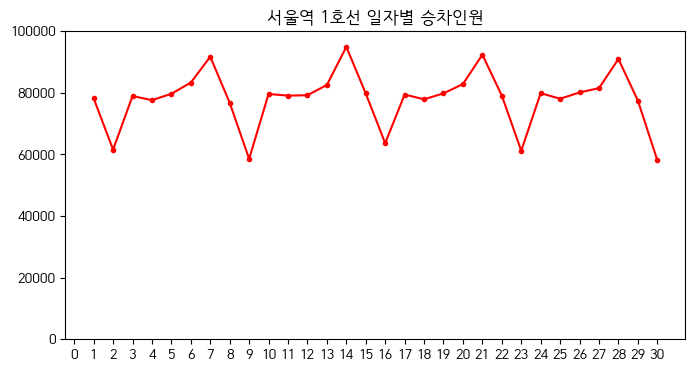

In [34]:
# 2 

seoul1 = df[(df['stn'] == '서울역') & (df['line'] == '1호선')]

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(seoul1['day'], seoul1['geton'], "ro-", markersize=3)
ax.set_xticks(np.arange(0,31))
ax.set_ylim(0,100000)
ax.set_title("서울역 1호선 일자별 승차인원")

plt.show()

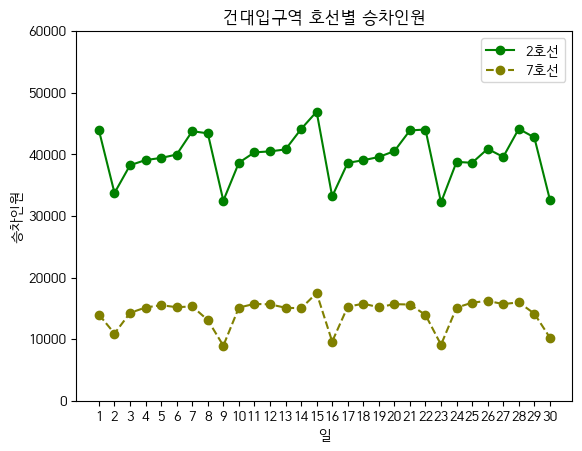

In [62]:
# 3 
ku2 = df[(df['stn'] == '건대입구') & (df['line'] == '2호선')]
ku7 = df[(df['stn'] == '건대입구') & (df['line'] == '7호선')]

fig, ax = plt.subplots()
ax.plot(ku2['day'], ku2['geton'], "go-", label = '2호선')
ax.plot(ku7['day'], ku7['geton'], "o--", color='olive', label='7호선')
ax.set_xticks(np.arange(1,31))
ax.set_ylim(0,60000)

ax.set_title("건대입구역 호선별 승차인원")
ax.legend()
ax.set_xlabel("일")
ax.set_ylabel("승차인원")

plt.show()

Text(0.5, 1.0, '1-9호선 일 평균 승차 인원 2025년 11월')

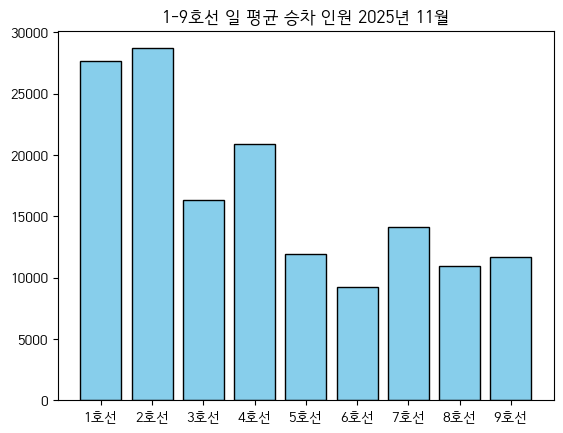

In [109]:
# 4
list9 = [f"{i}호선" for i in range(1, 10)]
line9 = df[df['line'].isin(list9)]
grp = line9.groupby('line')
grp9 = round(grp[['geton']].aggregate('mean'),1).reset_index() # reset_index() 컬럼 추출
grp9.columns = ['line', 'mean']

fig, ax = plt.subplots()
ax.bar(grp9['line'], grp9['mean'], color='skyblue', edgecolor='black')
ax.set_title("1-9호선 일 평균 승차 인원 2025년 11월")



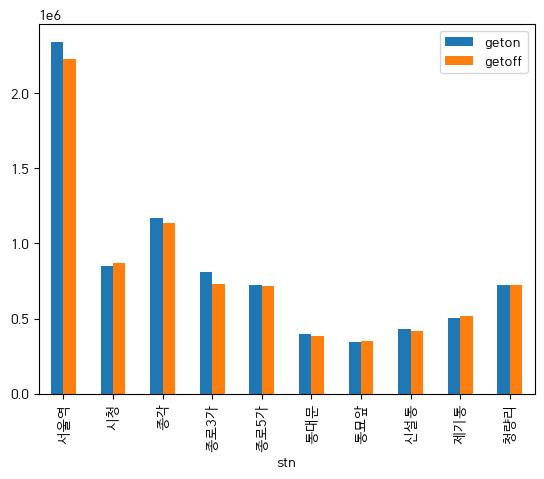

In [147]:
# 5

line1 = df[df['line'] == '1호선']
result = line1.groupby('stn')[['geton', 'getoff']].agg('sum').iloc[[2,3,6,7,8,0,1,4,5,9],:]
result = result.rename(index = {'청량리(서울시립대입구)': '청량리'})

result.plot.bar()
plt.show()


Text(0, 0.5, '하차인원')

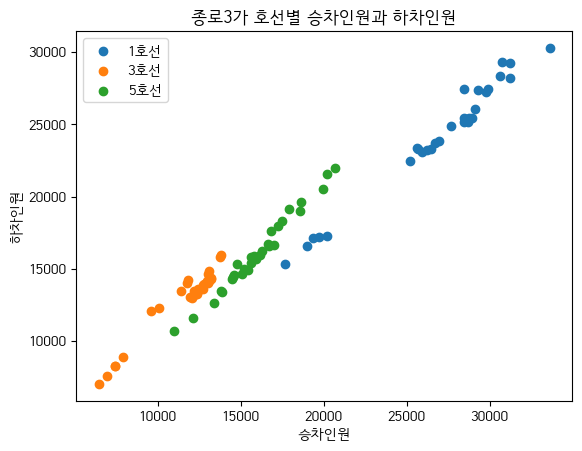

In [161]:
# 6 
line1 = df[(df['line'] == '1호선') & (df['stn'] == '종로3가')]
line3 = df[(df['line'] == '3호선') & (df['stn'] == '종로3가')]
line5 = df[(df['line'] == '5호선') & (df['stn'] == '종로3가')]

fig, ax = plt.subplots()
ax.scatter(x=line1['geton'], y=line1['getoff'], label='1호선')
ax.scatter(x=line3['geton'], y=line3['getoff'], label='3호선')
ax.scatter(x=line5['geton'], y=line5['getoff'], label='5호선')

ax.legend()
ax.set_title("종로3가 호선별 승차인원과 하차인원")
ax.set_xlabel("승차인원")
ax.set_ylabel("하차인원")

In [190]:
# 7

df
data = df[df['stn'].isin(['고속터미널', '서울역'])].copy()
data['total'] = data['geton'] + data['getoff']
grp = data.groupby(['stn', 'day'])
daily = grp[['geton', 'getoff', 'total']].sum().reset_index()
daily
daily.iloc[:2, :]
daily.iloc[-3:, :]
pd.concat(  (daily.iloc[:2, :], daily.iloc[-3:, :])  )  #pd.concat 쓰려면 첫 번째 인자에 DataFrame 여러 개를 하나의 리스트/튜플로 묶어서 전달해야 함.


,stn,day,geton,getoff,total
0,고속터미널,1,105014,107018,212032
1,고속터미널,2,85285,84979,170264
57,서울역,28,142087,143515,285602
58,서울역,29,118738,120362,239100
59,서울역,30,95099,93985,189084


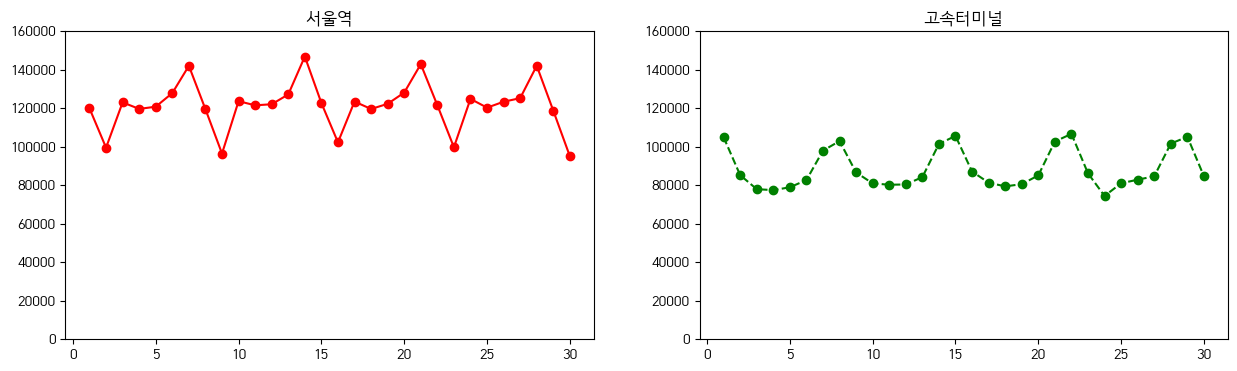

In [213]:
# 8

daily

express = daily[daily['stn'] == '고속터미널']
seoul = daily[daily['stn'] == '서울역']

seoul
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes.flatten()
for i in range(0,2):
    axes[i].set_ylim(0,160000)

axes[0].plot(seoul['day'], seoul['geton'], "ro-")
axes[1].plot(express['day'], express['geton'], "go--")
axes[0].set_title("서울역")
axes[1].set_title("고속터미널")

plt.show()


In [227]:
# 9

df = pd.read_excel("한국도로교통공단_일자별 시군구별 교통사고 통계_20241231.xlsx")
df['부상자수'] = df.경상자수 + df.중상자수 + df.부상신고자수
cb = df[df['시군구'].isin(['충주시', '청주시', '제천시'])]
cb = cb.iloc[:, [0,1,2,3,4,9]]
cb


,발생월,발생일,시도,시군구,사고건수,부상자수
58,1,1,충북,청주시,8,12
59,1,1,충북,충주시,3,4
194,1,2,충북,청주시,12,14
195,1,2,충북,충주시,3,3
340,1,3,충북,청주시,8,9
...,...,...,...,...,...,...
57420,12,30,충북,충주시,7,9
57421,12,30,충북,제천시,7,8
57580,12,31,충북,청주시,19,29
57581,12,31,충북,충주시,2,4


In [282]:
#10 

grp = cb.groupby('시군구')
result = grp[['사고건수', '부상자수']].aggregate('sum')
result

,사고건수,부상자수
시군구,,
제천시,807,1261
청주시,4162,6156
충주시,1105,1667


In [242]:
# 11

grpcb = cb.groupby(['발생월', '시군구'])
month = grpcb[['사고건수','부상자수']].aggregate('sum').reset_index()
month

,발생월,시군구,사고건수,부상자수
0,1,제천시,48,70
1,1,청주시,313,425
2,1,충주시,86,139
3,2,제천시,50,83
4,2,청주시,324,496
5,2,충주시,69,110
6,3,제천시,51,79
7,3,청주시,319,468
8,3,충주시,78,116
9,4,제천시,77,101


In [250]:
# 12

Chungju = month[month['시군구'] == '충주시']
Cheongju = month[month['시군구'] == '청주시']
jecheon = month[month['시군구'] == '제천시']
print(Chungju.head(3))
print(Cheongju.head(3))
print(jecheon.head(3))

   발생월  시군구  사고건수  부상자수
2    1  충주시    86   139
5    2  충주시    69   110
8    3  충주시    78   116
   발생월  시군구  사고건수  부상자수
1    1  청주시   313   425
4    2  청주시   324   496
7    3  청주시   319   468
   발생월  시군구  사고건수  부상자수
0    1  제천시    48    70
3    2  제천시    50    83
6    3  제천시    51    79


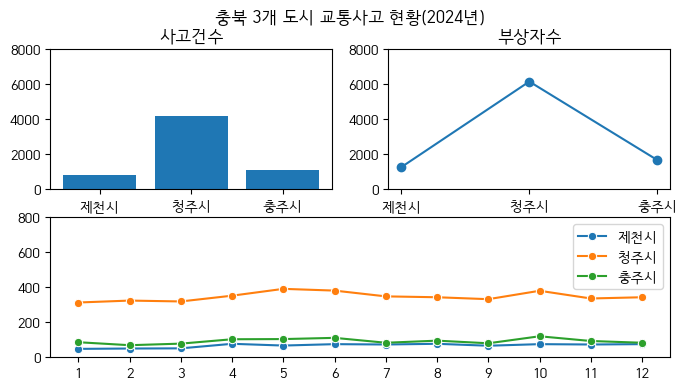

In [321]:
# 13

fig = plt.figure(figsize=(8,4))
spec = fig.add_gridspec(2,2)
ax00 = fig.add_subplot(spec[0,0])
ax01 = fig.add_subplot(spec[0,1])
ax1 = fig.add_subplot(spec[1,:])

# result = result.reset_index()

ax00.bar(result['시군구'], result['사고건수'])
ax01.plot(result['시군구'], result['부상자수'], marker='o')
sns.lineplot(data=month, x='발생월', y='사고건수', hue='시군구', ax=ax1, marker='o')


ax00.set_title("사고건수")
ax01.set_title("부상자수")
ax00.set_ylim(0,8000)
ax01.set_ylim(0,8000)
ax1.set_xticks(np.arange(1,13,1))

ax1.set_ylim(0,800)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.get_legend().set_title(None)

plt.suptitle("충북 3개 도시 교통사고 현황(2024년)")
plt.show()

In [329]:
# 14 

data = pd.read_excel("서울시지하철-25-11.xlsx")
data['day'] = data['date'] % 100
data['total'] = data['geton'] + data['getoff']
jong3 = data[data['stn'] == '종로3가']
jong3.head()

,date,line,stn,geton,getoff,day,total
3,20251101,1호선,종로3가,30735,29310,1,60045
70,20251101,3호선,종로3가,11799,14005,1,25804
144,20251101,5호선,종로3가,20178,21572,1,41750
620,20251102,1호선,종로3가,19386,17149,2,36535
687,20251102,3호선,종로3가,7445,8322,2,15767


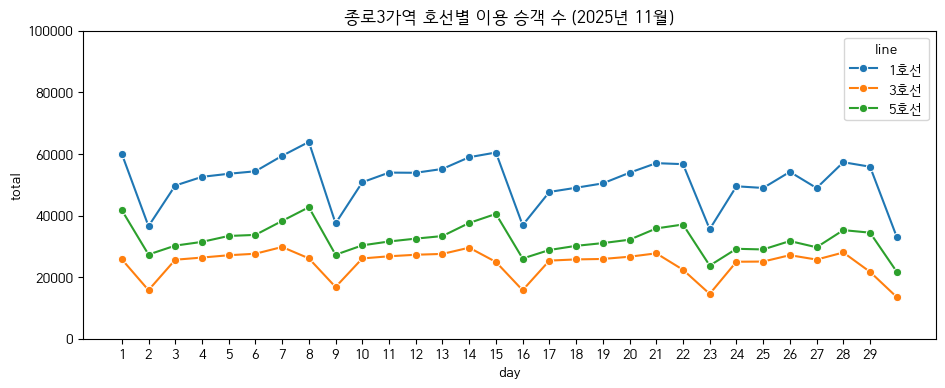

In [341]:
# 15

fig, ax = plt.subplots(figsize=(11,4))

sns.lineplot(data=jong3, x='day', y='total', hue='line', marker='o', ax=ax)
ax.set_xticks(np.arange(1,30,1))
ax.set_ylim(0,100000)
ax.set_title("종로3가역 호선별 이용 승객 수 (2025년 11월)")

plt.show()

In [386]:
# 16
line = [f"{i}호선" for i in range(1,10)]
line9 = data[data['line'].isin(line)]
line9

,date,line,stn,geton,getoff,day,total
0,20251101,1호선,서울역,78227,75501,1,153728
1,20251101,1호선,시청,24120,25337,1,49457
2,20251101,1호선,종각,29987,28009,1,57996
3,20251101,1호선,종로3가,30735,29310,1,60045
4,20251101,1호선,종로5가,26411,25833,1,52244
...,...,...,...,...,...,...,...
18189,20251130,9호선,구반포,407,420,30,827
18190,20251130,9호선,신반포,2941,3113,30,6054
18191,20251130,9호선,고속터미널,14400,21019,30,35419
18192,20251130,9호선,사평,2349,2350,30,4699


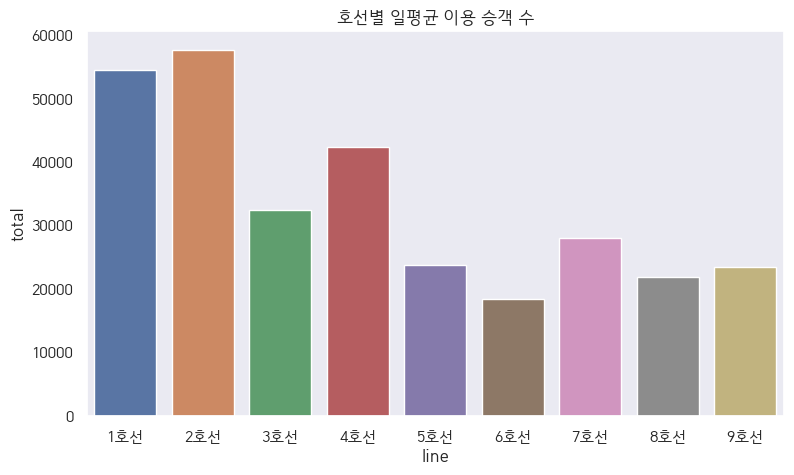

In [387]:
# 17
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=line9, x='line', y='total', hue='line', errorbar=None)
ax.set_title('호선별 일평균 이용 승객 수')
plt.show()

In [446]:
# 18 

df = pd.read_csv("한국도로교통공단_시군구별 월별 교통사고 통계_20241231.csv", encoding='CP949')
big4 = df[df['시도'].isin(['경남', '경북', '대구', '부산'])]
big4

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
300,부산,중구,1,25,0,10,22,3
301,부산,중구,2,22,0,8,23,3
302,부산,중구,3,36,0,6,40,1
303,부산,중구,4,31,0,7,35,3
304,부산,중구,5,28,0,13,27,1
...,...,...,...,...,...,...,...,...
2424,대구,군위군,8,13,0,3,13,3
2425,대구,군위군,9,15,5,8,10,0
2426,대구,군위군,10,9,0,13,7,0
2427,대구,군위군,11,11,0,6,10,0


In [399]:
# 19

grp4 = big4.groupby(['발생월', '시도'])
result = grp4[['사고건수']].aggregate('sum').reset_index()
result

,발생월,시도,사고건수
0,1,경남,866
1,1,경북,791
2,1,대구,812
3,1,부산,835
4,2,경남,783
5,2,경북,684
6,2,대구,746
7,2,부산,857
8,3,경남,870
9,3,경북,784


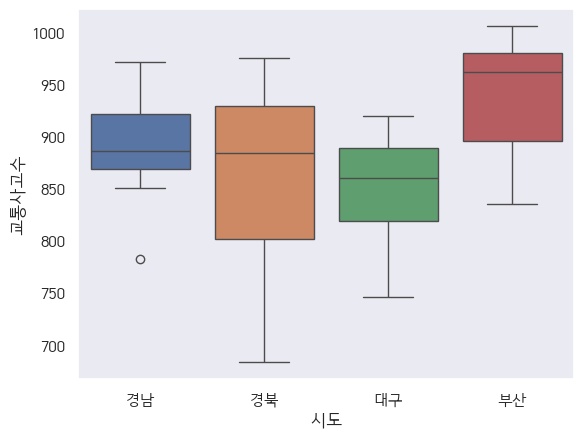

In [409]:
# 20 
fig, ax = plt.subplots()
sns.boxplot(result, x='시도', y='사고건수', hue='시도', ax=ax)
ax.set_ylabel("교통사고수")
plt.show()


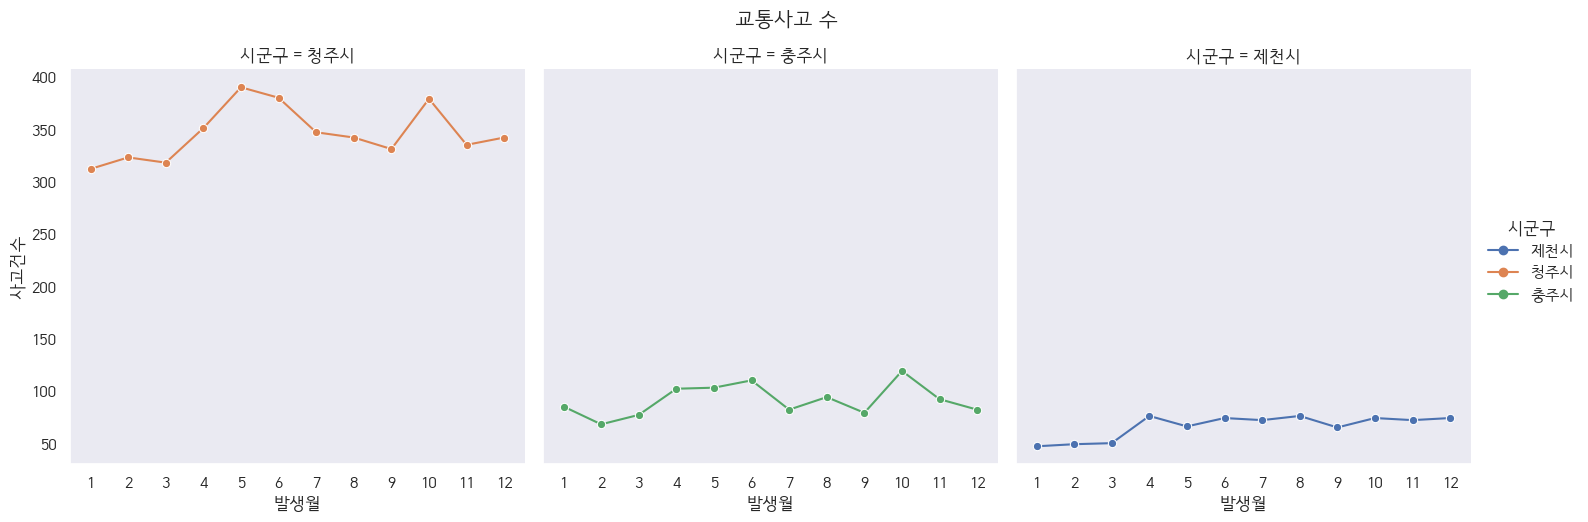

In [444]:
# 21

g = sns.relplot(data=month, x='발생월', y='사고건수', kind='line',  col ='시군구', col_order=['청주시', '충주시', '제천시'], marker='o', hue='시군구')
g.fig.suptitle("교통사고 수", y=1.04)
g.set(xticks=range(1,13))

plt.show()

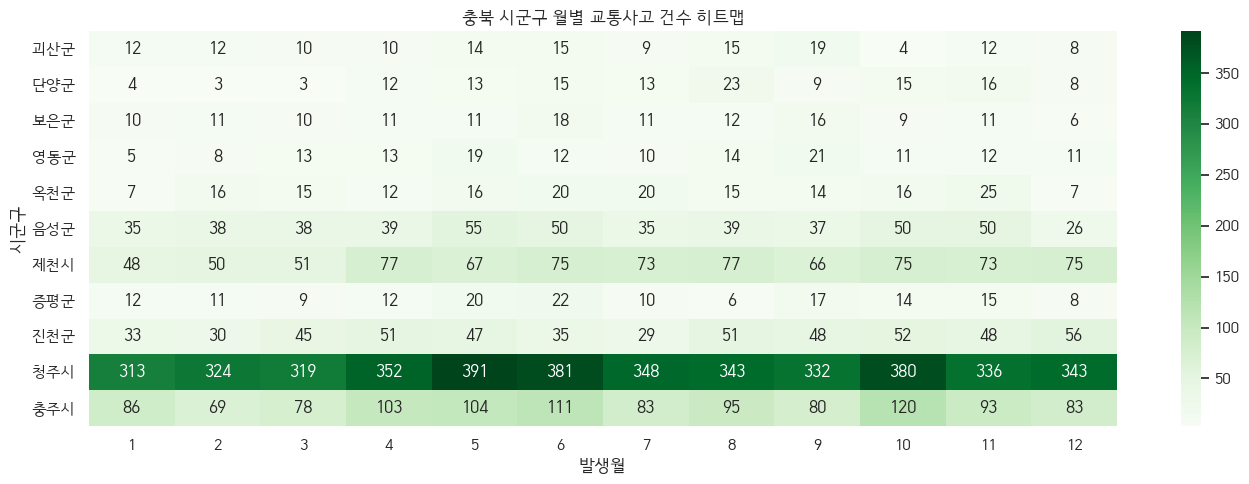

In [469]:
# 22

cb = df[df['시도'] == '충북']
cb_pt = cb.pivot_table(
    index = '시군구',
    columns = '발생월',
    values = '사고건수',
    aggfunc = 'sum'
)

fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(data=cb_pt, cmap='Greens', annot=True, fmt='g', ax=ax)
ax.set_title("충북 시군구 월별 교통사고 건수 히트맵")
plt.tight_layout()